# **1. INTRODUCTION**

The objective of this project is to predict the Air Quality Index (AQI) based on environmental pollution indicators. By analyzing the correlations among pollutants and applying a RandomForestRegressor model, this project demonstrates how various pollutants contribute to air quality and evaluates the accuracy of predictions.

# **2. DATA OVERVIEW**

The dataset, "city_day.csv," contains 17,909 records with 16 features, including pollutants like PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, Xylene, AQI, and City. The dataset also includes Date and AQI_Bucket columns, which are dropped during preprocessing

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
data=pd.read_csv('city_day.csv')
df=pd.DataFrame(data)
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


# **3. DATA CLEANING and PREPARATIONS**


- **Duplicates**: No duplicate records are present.
- Date and AQI_Bucket columns, which are dropped during preparations.
- **Null Values**: Several features contain missing values, which are filled with the median value of the respective columns.

In [107]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [108]:
df.duplicated().sum()

0

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [110]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [98]:
df.shape

(29531, 16)

In [99]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [111]:
df.drop(columns=['AQI_Bucket'],inplace=True)
df.drop(columns=['Date'],inplace=True)

In [112]:
df['PM2.5'].fillna(df['PM2.5'].median(), inplace=True)
df['PM10'].fillna(df['PM10'].median(), inplace=True)
df['NO'].fillna(df['NO'].median(), inplace=True)
df['NO2'].fillna(df['NO2'].median(), inplace=True)
df['NOx'].fillna(df['NOx'].median(), inplace=True)
df['NH3'].fillna(df['NH3'].median(), inplace=True)
df['CO'].fillna(df['CO'].median(), inplace=True)
df['SO2'].fillna(df['SO2'].median(), inplace=True)
df['O3'].fillna(df['O3'].median(), inplace=True)
df['Benzene'].fillna(df['Benzene'].median(), inplace=True)
df['Toluene'].fillna(df['Toluene'].median(), inplace=True)
df['Xylene'].fillna(df['Xylene'].median(), inplace=True)
df['AQI'].fillna(df['AQI'].median(), inplace=True)

<ipython-input-112-834b88b6f853>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PM2.5'].fillna(df['PM2.5'].median(), inplace=True)
<ipython-input-112-834b88b6f853>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

# **4. VISUALIZATION**

- **Histograms of Features**: A plt.hist function generates histograms for each feature, illustrating the frequency distribution. This provides an overview of pollutant data ranges and helps identify skewed distributions.

- **AQI Distribution**: A KDE plot of AQI using sns.histplot(df['AQI'], kde=True) displays AQI's density, useful for visualizing how values cluster and identifying peaks in the AQI dataset.

<function matplotlib.pyplot.show(close=None, block=None)>

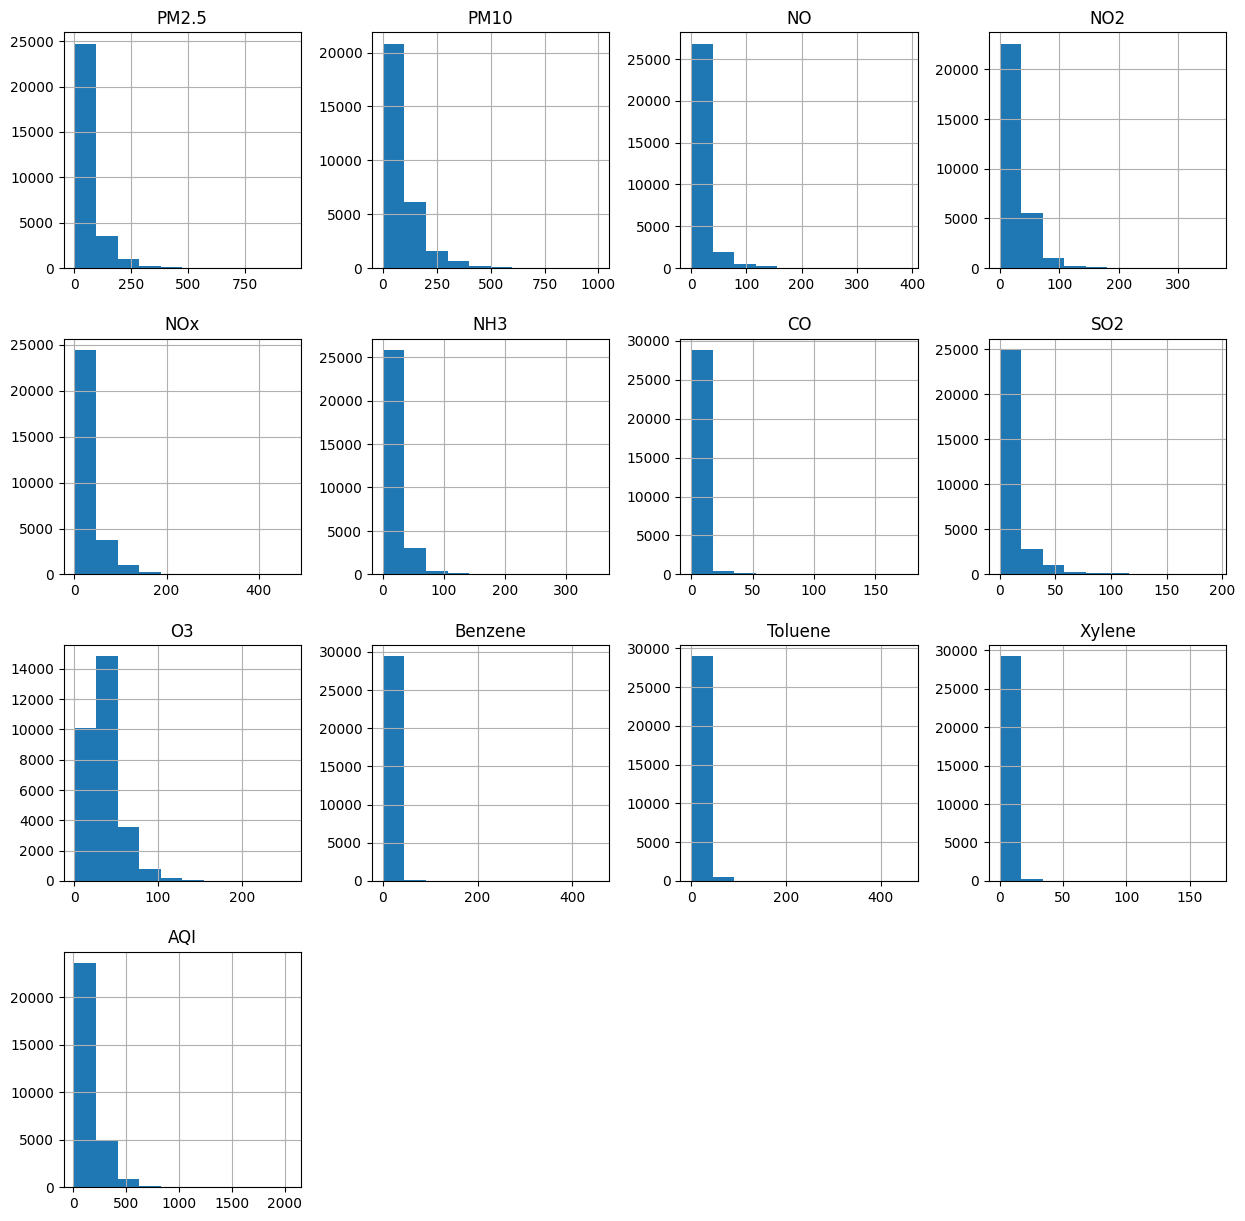

In [102]:
df.hist(figsize=(15,15))
plt.show

<Axes: xlabel='AQI', ylabel='Count'>

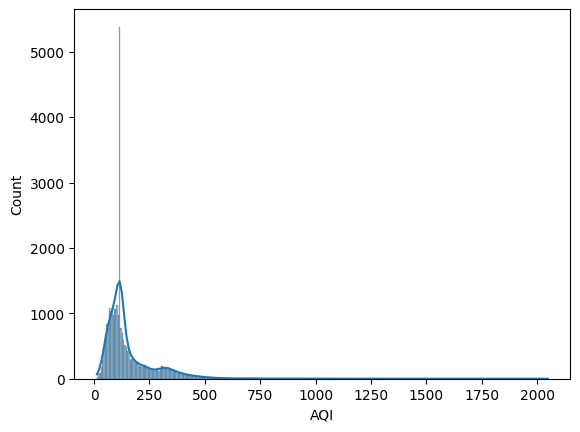

In [114]:
sns.histplot(df['AQI'], kde=True)

In [59]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0
1,Ahmedabad,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0
2,Ahmedabad,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25,118.0
3,Ahmedabad,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00,118.0
4,Ahmedabad,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78,118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0
29529,Visakhapatnam,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0


# **5. DATA ENCODING**

- In this code, encoding the City column using LabelEncoder is necessary because machine learning models generally work with numerical data, not categorical strings. Since City is a categorical feature (with each city represented as a unique string), it needs to be converted into a numerical format for the model to interpret and process it. LabelEncoder assigns a unique numeric value to each city, allowing the model to use the city as a feature while training and making predictions without introducing unnecessary complexity.

- Also add histogram of the data after encoding

In [60]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['City']=le.fit_transform(df['City'])


In [61]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,0,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0
1,0,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0
2,0,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25,118.0
3,0,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00,118.0
4,0,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78,118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,25,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,25,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,25,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0
29529,25,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0


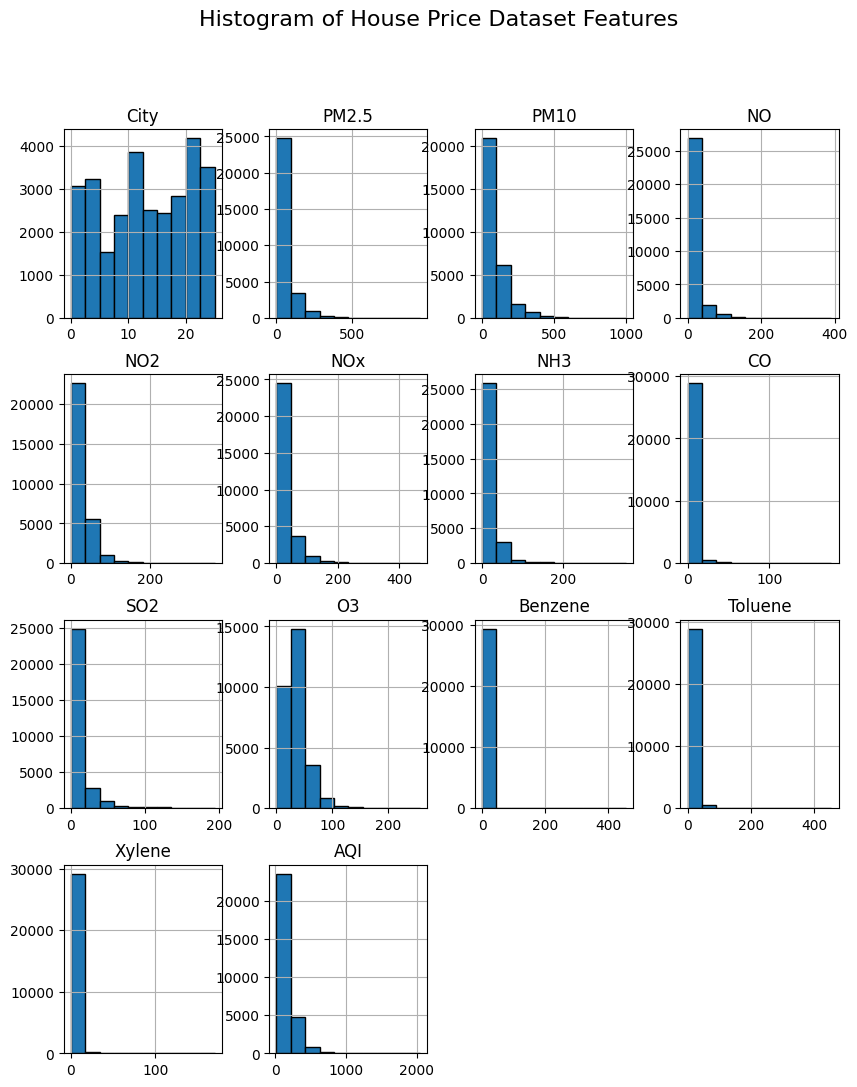

In [62]:
df.hist(edgecolor='black',figsize=[10,12])
plt.suptitle('Histogram of House Price Dataset Features', fontsize=16)
plt.show()

# **6. CORRELATION ANALYSIS**


In this analysis, correlation analysis is used to examine the strength and direction of the relationships between different air quality indicators and the AQI (Air Quality Index). By calculating the correlation matrix, you can identify how each feature, such as PM2.5, PM10, NO2, and CO, relates to the AQI. Strongly correlated variables (either positive or negative) may be more influential in determining the AQI.

A heatmap of the correlation matrix provides a visual representation, with colors representing correlation values, making it easier to spot high or low correlations at a glance. Additionally, any variable with a low correlation to AQI can be considered for potential removal, helping reduce dimensionality and improve model focus on impactful features.

In this code, we drop some low-correlation features like Benzene, NH3, Xylene, and others to streamline the dataset and focus on more influential predictors.

NO and NOx both are independent feature and also highly correlated each other, so we remove one of that

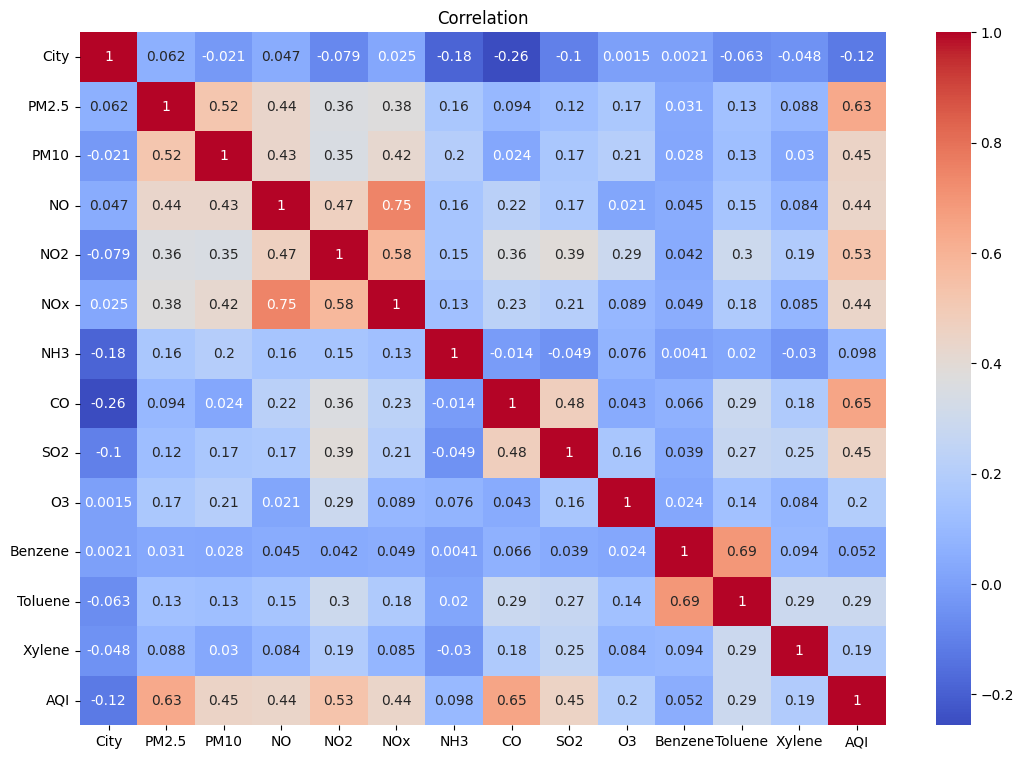

In [63]:
corr_matrix= df.corr()
plt.figure(figsize=(13, 9))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation')
plt.show()

In [64]:
s=df.corr()['AQI']
s.sort_values(ascending=False)

,AQI
AQI,1.000000
CO,0.650475
PM2.5,0.633654
NO2,0.531952
SO2,0.454182
PM10,0.447686
NO,0.438039
NOx,0.436282
Toluene,0.288749
O3,0.199100


In [65]:
df.drop('Benzene',axis=1,inplace=True)
df.drop('NH3',axis=1,inplace=True)
df.drop('Xylene',axis=1,inplace=True)
df.drop('O3',axis=1,inplace=True)
df.drop('Toluene',axis=1,inplace=True)
df.drop('City',axis=1,inplace=True)
df.drop('NO',axis=1,inplace=True)
# df.drop('PM10',axis=1,inplace=True)

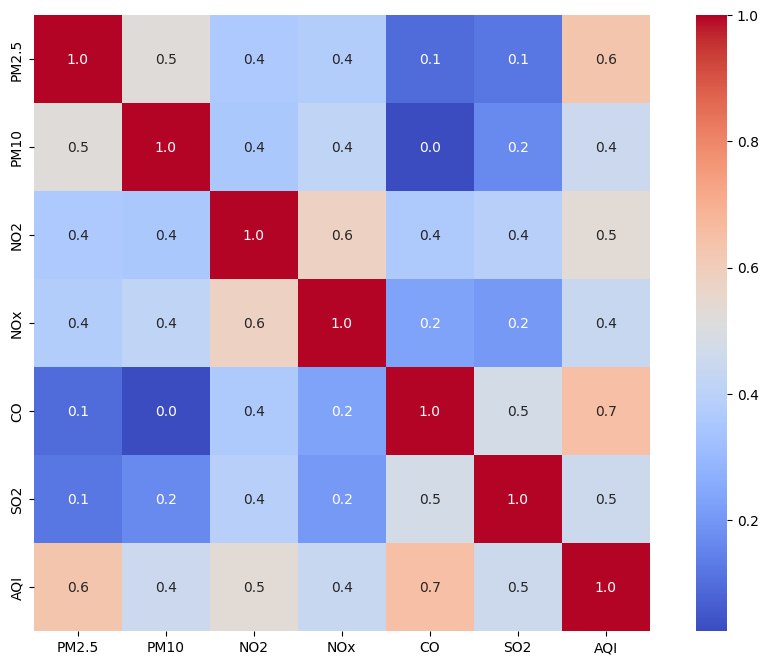

In [66]:
corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True, fmt='0.01f', cmap='coolwarm',annot_kws=None, linewidths=0, robust=True,square=True)
plt.show()

In [67]:
cm=df.corr()["AQI"]
cm.sort_values(ascending=False)

,AQI
AQI,1.000000
CO,0.650475
PM2.5,0.633654
NO2,0.531952
SO2,0.454182
PM10,0.447686
NOx,0.436282


In [68]:
df.shape

(29531, 7)

# **7. OUTLIER DETECTION**

**Box Plots for Skewed Data**: To identify skewness in the data, sns.boxplot() was applied to observe data spread and identify potential outliers. Skewed distributions indicate the need for data transformation.

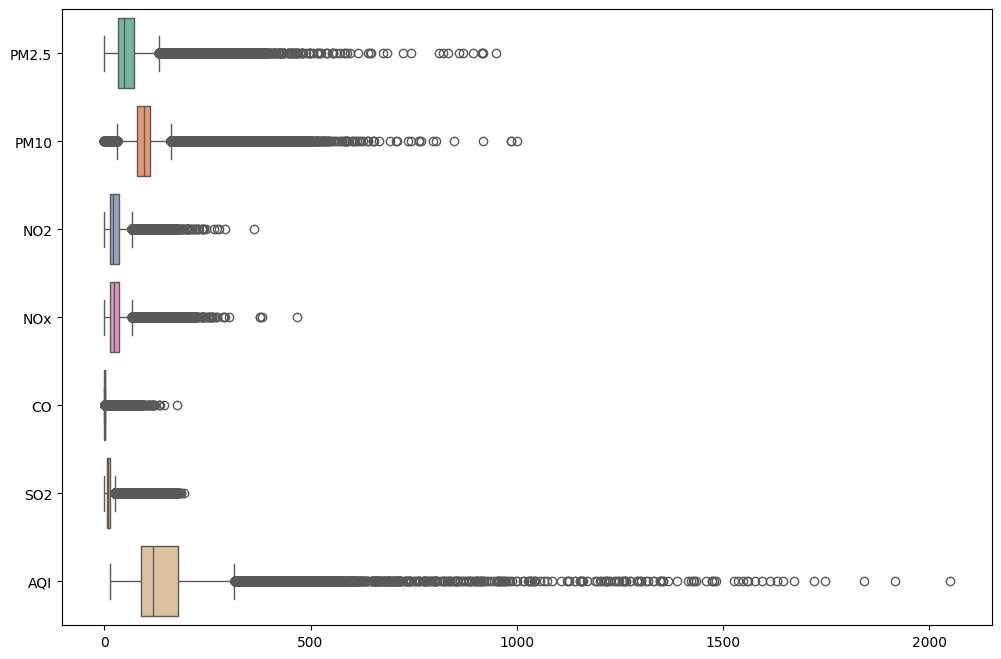

In [69]:
plt.figure(figsize=(12,8))
sns.boxplot(df,orient='h',palette='Set2')
plt.show()

# **8. SKEWNESS HANDLING**

- Skewness is handled by applying a log transformation to numerical features. Skewed data distributions can affect model performance, especially in algorithms sensitive to variance. Here’s a breakdown of the process:

**1. Log Transformation**:
The data is transformed using np.log(df + 1) to adjust all values by adding 1, preventing log(0) errors. This approach compresses larger values more than smaller ones, reducing skewness.

**2. Visualization**:
After the transformation, histograms of each log-transformed feature are plotted to verify distribution normalization.

**3. Effectiveness**:
The transformed features show a more symmetric distribution, potentially enhancing model performance and reducing bias.

- This skewness correction is essential for ensuring the data meets assumptions of normality, which benefits many machine learning models.

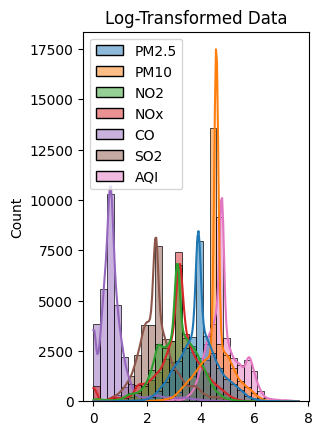

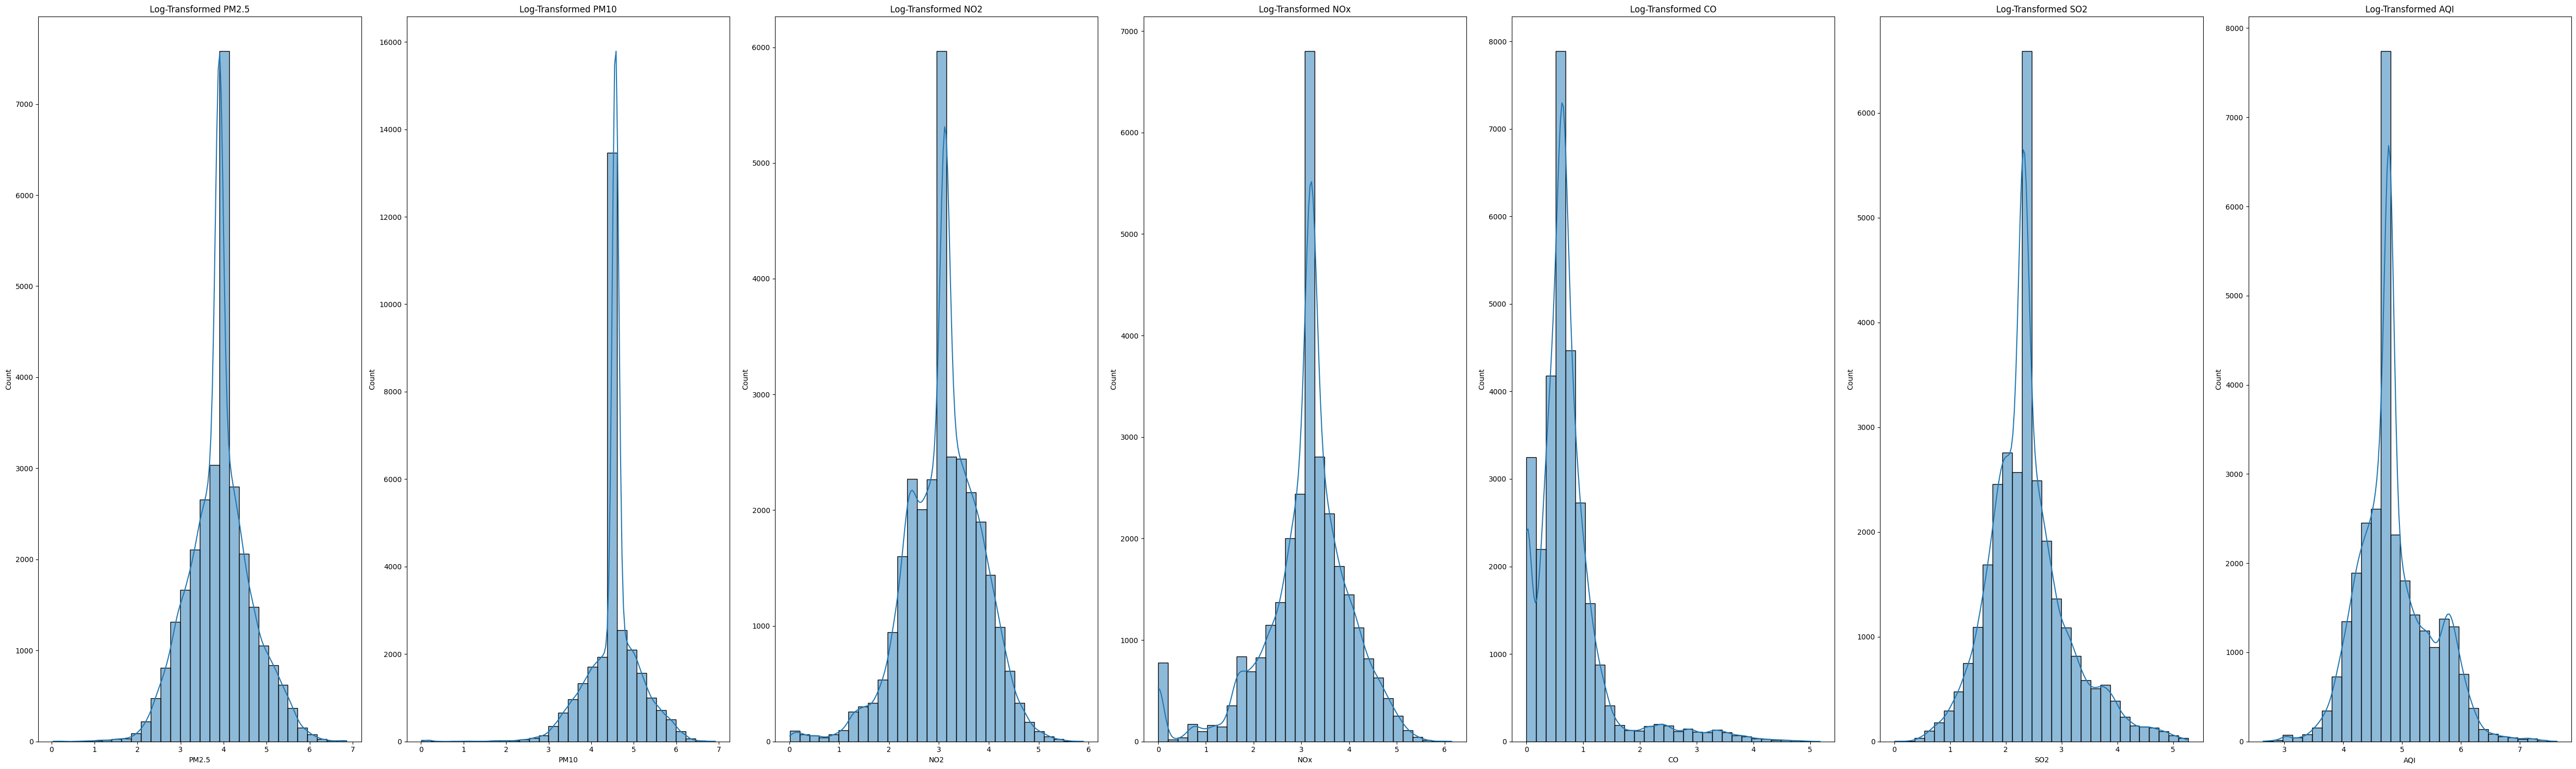

In [70]:
#To handle skewness
import numpy as np
log_data = np.log(df + 1)  # Adding 1 to avoid log(0)

# Plotting log-transformed data distribution
plt.subplot(1,2,2)
sns.histplot(log_data, bins=30, kde=True)
plt.title("Log-Transformed Data")
plt.show()

# Assuming log_data is a DataFrame with multiple features
num_features = log_data.shape[1]  # Number of features
plt.figure(figsize=(50, 15))  # Adjust the figure size as needed

for i, column in enumerate(log_data.columns, 1):
    plt.subplot(1, num_features, i)  # Adjust layout for each feature
    sns.histplot(log_data[column], bins=30, kde=True)
    plt.title(f"Log-Transformed {column}")

plt.tight_layout()
plt.show()

# **9. OUTLIER HANDLING**

 outlier handling is performed using the Interquartile Range (IQR) method. Here’s a detailed breakdown of the process:

**1. Calculating IQR**:

The IQR is calculated as the difference between the third quartile (Q3) and the first quartile (Q1) of a feature, where IQR=Q3−Q1.

**2. Defining Outlier Bounds**:

Lower bound =
𝑄
1
−
1.5
×
IQR
Q1−1.5×IQR
Upper bound =
𝑄
3
+
1.5
×
IQR
Q3+1.5×IQR
Values outside these bounds are considered outliers.
**3. Removing Outliers**:

Using these bounds, data points are filtered to retain only those within the calculated range.

In [71]:
# Q1=np.quantile(df,0.25)
# Q2=np.quantile(df,0.50)
# Q3=np.quantile(df,0.75)
# Q1,Q2,Q3
# IQR=Q3-Q1
# IQR

In [72]:
# def remove_outliers_iqr(df, column):
#     # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)

#     # Calculate the Interquartile Range (IQR)
#     IQR = Q3 - Q1

#     # Define the lower and upper bounds for detecting outliers
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Filter out the outliers from the DataFrame
#     df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
#     return df_filtered


# df_no_outliers = remove_outliers_iqr(df, 'AQI')
# df_no_outliers

In [73]:
# plt.figure(figsize=(10,10))
# sns.boxplot(df_no_outliers,orient='h',palette='Set1')
# plt.show()

In [74]:
# df_no_outliers.shape

In [75]:
df=log_data

# **10. MODEL TRAINING and EVALUATION**

- **Data Splitting**: The data is split into training (80%) and testing sets (20%) to evaluate model performance. The split ensures the model can generalize to new, unseen data.

- **Random Forest Regressor Model**: The RandomForestRegressor is chosen and trained on the data due to its robustness and ability to handle complex datasets.

- **Evaluation Metrics**: The model is evaluated with Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² Score:

    - MSE measures average squared errors, showing the quality of predictions.
    - MAE provides the average absolute difference between predictions and
      actual values.
    - R² Score indicates the proportion of variance in car prices explained by
      the model (0.9158 indicates a high level of accuracy).

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [77]:
cor=df.corr()['AQI']#finding correlatiom
cor.sort_values(ascending=False)

,AQI
AQI,1.000000
PM2.5,0.791353
PM10,0.630454
CO,0.542678
NO2,0.466398
NOx,0.405340
SO2,0.401969


In [78]:
independent_feature=['PM2.5','PM10','NO2','NOx','CO','SO2'] #independent feature
dependent_feature=['AQI']#dependent feature
x=df[independent_feature]
y=df[dependent_feature]

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,#0.2 means 20% of data specified for testing set,and the other 80% for training set
                                               random_state=42)# to take the same data for training and testing set

print(x_train.shape)  # Prints the shape of x_train (rows, columns)
print(x_test.shape)   # Prints the shape of x_test
print(y_train.shape)  # Prints the shape of y_train
print(y_test.shape)   # Prints the shape of y_test

(23624, 6)
(5907, 6)
(23624, 1)
(5907, 1)


In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
model=RandomForestRegressor()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [82]:
y_pred=model.predict(x_test)
y_pred

array([4.77827148, 4.77827148, 4.87813099, ..., 4.79918424, 4.31817101,
       4.9721949 ])

In [83]:
mse=mean_squared_error(y_test,y_pred)#An indicator of average squared prediction error.
mae=mean_absolute_error(y_test,y_pred)#An indicator of average absolute prediction error
r2=r2_score(y_test,y_pred)#An indicator of the model’s fit quality.
print('mean squared error:',mse)
print('mean absolute error:',mae)
print('r2 score:',r2)

mean squared error: 0.04634268458465058
mean absolute error: 0.1347301245116849
r2 score: 0.8718535324490463


In [84]:
df.head(5)

,PM2.5,PM10,NO2,NOx,CO,SO2,AQI
0,3.903386,4.571407,2.955951,2.898671,0.652325,3.354804,4.779123
1,3.903386,4.571407,2.814810,2.859913,0.678034,3.240637,4.779123
2,3.903386,4.571407,3.010621,3.424263,2.912351,3.403528,4.779123
3,3.903386,4.571407,2.969388,2.942859,0.993252,2.975019,4.779123
4,3.903386,4.571407,3.109953,3.657389,3.139833,3.697096,4.779123


# **11. AQI PREDICTION INTERFACE**



- **Input Collection**: Allow the user to enter values for pollutants (PM2.5, PM10, NO2, NOx, CO, SO2).
- **Prediction**: Use the trained Random Forest Regressor model to predict AQI based on these values.
- **Output Display**: Show the predicted AQI immediately on submission.

In [90]:
PM2=float(input('Enter the PM2.5  '))
PM10=float(input('Enter the PM10  '))
NO2=float(input('Enter the NO2  '))
NOx=float(input('Enter the NOx  '))
CO=float(input('Enter the CO  '))
SO2=float(input('Enter the SO2  '))
user_input=np.array([[PM2, PM10, NO2, NOx, CO, SO2]])
predicted=model.predict(user_input)
print('predicted price:',predicted)

Enter the PM2.5  3.903386
Enter the PM10  4.571407
Enter the NO2  2.969388
Enter the NOx  2.942859
Enter the CO  2.942859
Enter the SO2  2.975019
predicted price: [4.7877158]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# **12. RESULTS and ANALYSIS**

**Actual vs. Predicted AQI Plot**: The sns.regplot plot provides a visual comparison between actual and predicted AQI, helping identify how well the model aligns with real data. A closer alignment between the points and the regression line indicates higher model accuracy

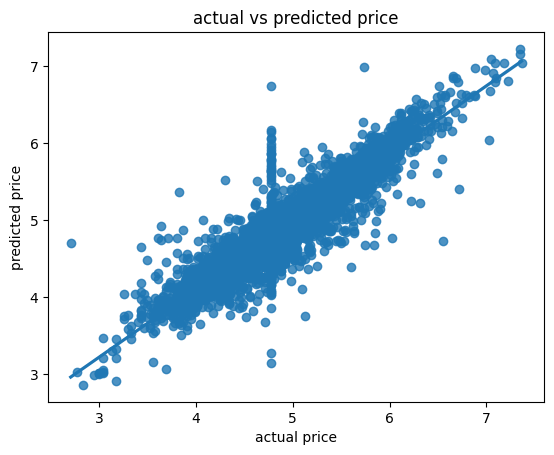

In [86]:
sns.regplot(x=y_test,y=y_pred)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual vs predicted price')
plt.show()

# **13. CONCLUSION**

The AQI prediction model was successfully built using features like PM2.5, PM10, NO2, NOx, CO, and SO2 after thorough data cleaning and exploratory analysis. Outliers were handled, and log transformation was applied to reduce skewness. The model achieved good predictive performance, indicated by a high R-squared score and low mean squared error.

The Random Forest model provided accurate AQI predictions, and the comparison between actual and predicted values showed alignment, confirming model reliability. This project demonstrates an effective approach for AQI forecasting based on air pollutant levels

# **14. REFERENCES**

- Kaggle
- ChatGPT
- Gemini

In [87]:
# import pickle
# filename='advertising_model.pkl'
# pickle.dump(model,open(filename,'wb'))

In [88]:
# # load file
# with open('advertising_model.pkl', 'rb') as file:
#     model = pickle.load(file)

In [89]:
# import pickle
# with open('model.pkl', 'wb') as file:
#     pickle.dump(model, file)